In [34]:
!pip install Pillow

     |████████████████████████████████| 2.1 MB 5.0 MB/s eta 0:00:01


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

import random
import math
# import networkx as nx

import boto3
from PIL import Image

import requests
import json

from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()  # ⬅ add this line

# %matplotlib inline
plt.style.use('ggplot')
sns.set()
sns.set_style('white')

pd.set_option('display.max_columns', 50)

In [36]:
import pickle # save images
import time # get time stamp of models trained

import matplotlib.image as mpimg # show images
from io import BytesIO # reading bytes

In [ ]:
# orders_df = pd.read_csv('data/orders_df.csv', index_col=0)

# orders_df.head(2)

# # sns.set()
# # sns.palplot(sns.dark_palette("purple"))

## Full Data Number of Species

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))

# ax = sns.countplot(orders_df['species_group'], order=orders_df.groupby('species_group').count()['family'].sort_values(ascending=False).index);
# plt.xticks(rotation=90);
# ax.set_title('Number of Species in Family Group')
# ax.set_xlabel('Family Groups')
# ax.set_ylabel('Number of Species')
# ax.grid(False)
# plt.tight_layout()

In [ ]:
# final_orders.to_csv('data/final_orders.csv')

## Read in final csv

In [3]:
final_orders = pd.read_csv('data/final_orders.csv', index_col=0)

In [4]:
final_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21129 entries, 0 to 21128
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_path      21129 non-null  object
 1   img_name       21129 non-null  object
 2   class_id       21129 non-null  int64 
 3   txt_labels     21129 non-null  object
 4   order          21129 non-null  object
 5   family         21129 non-null  object
 6   species_group  21129 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [17]:
group_sort = final_orders.groupby('species_group').count()['family'].sort_values(ascending=False)

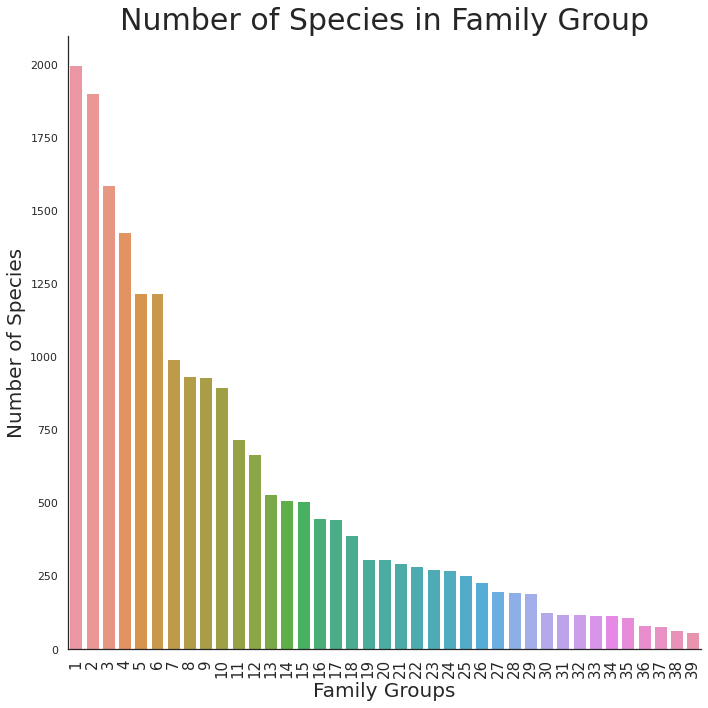

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

sns.despine()
ax = sns.countplot(final_orders['species_group'], order=group_sort.index);
plt.xticks(ticks=np.arange(0,39), labels=np.arange(1,40), rotation=90, fontsize=15)
ax.set_title('Number of Species in Family Group', fontsize=30)
ax.set_xlabel('Family Groups', fontsize=20)
ax.set_ylabel('Number of Species', fontsize=20)
ax.grid(False)

plt.tight_layout()

plt.savefig('graphs/readme_num_fam_group.png')

In [21]:
group_top5 = final_orders.groupby('species_group').count()['family'].sort_values(ascending=False)[:5]

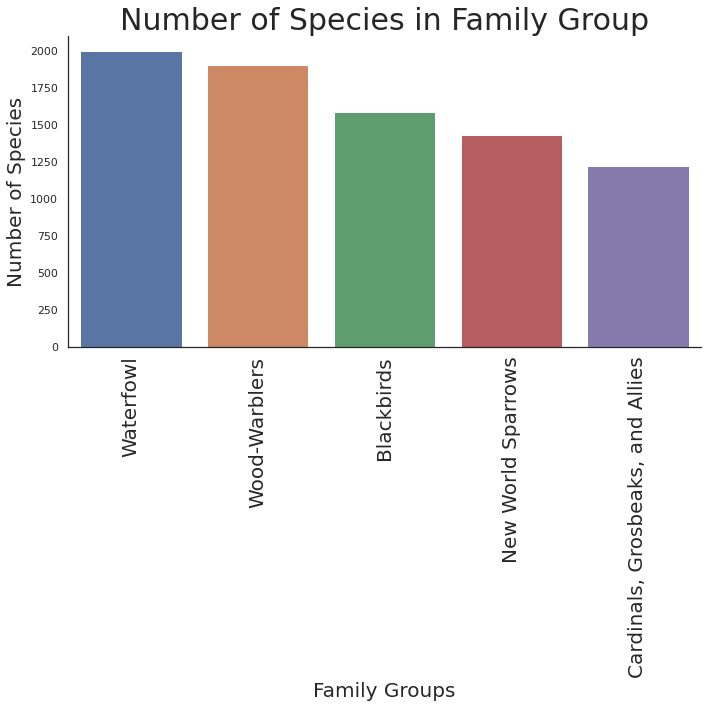

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

sns.despine()
ax = sns.barplot(x=group_top5.index.values, y=group_top5.values);
plt.xticks(rotation=90, fontsize=20);
ax.set_title('Number of Species in Family Group', fontsize=30)
ax.set_xlabel('Family Groups', fontsize=20)
ax.set_ylabel('Number of Species', fontsize=20)
ax.grid(False)
plt.tight_layout()

plt.savefig('graphs/readme_top5_fam_group.png')

In [23]:
order_sort = final_orders.groupby('order').count()['species_group'].sort_values(ascending=False)

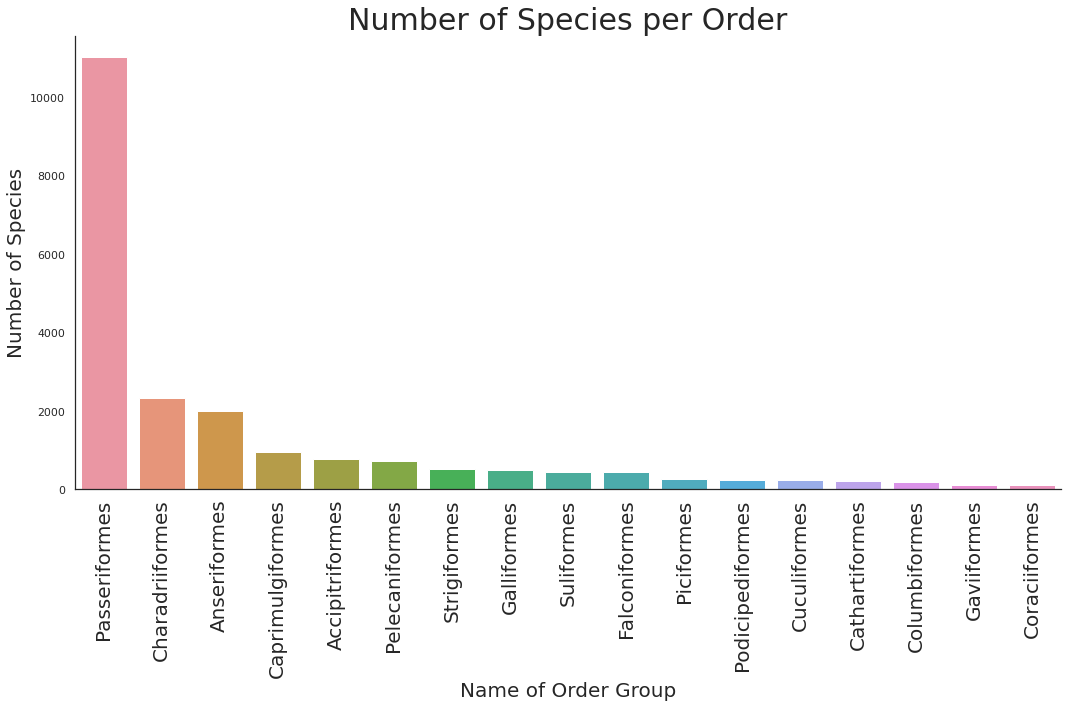

In [24]:
fig, ax = plt.subplots(figsize=(15,10))

sns.despine()
ax = sns.countplot(final_orders['order'], order=order_sort.index);
plt.xticks(rotation=90, fontsize=20);
ax.set_title('Number of Species per Order', fontsize=30)
ax.set_xlabel('Name of Order Group', fontsize=20)
ax.set_ylabel('Number of Species', fontsize=20)
ax.grid(False)
plt.tight_layout()

plt.savefig('graphs/readme_num_species_order.png')

## Plot Num Species in Orders

In [25]:
final_orders[final_orders['species_group']=='Cardinals, Grosbeaks, and Allies']['file_path'][1055:1057]

18483    0771/feffb4db5f704fc1a5a784a3dc56a877.jpg
19781    0770/01022e9f70694b6a80ef5d166e6025dc.jpg
Name: file_path, dtype: object

In [26]:
bucket = 'cwbirdsimages'
img_dir = 'images'

In [41]:
s3 = boto3.client('s3')

# grab duck image
obj = s3.get_object(Bucket=bucket, Key=f'images/0337/47b4bab08e524f0f9dff439c5386b70b.jpg')
img_bytes = BytesIO(obj['Body'].read())
waterfowl1 = Image.open(img_bytes)

# grab hawk image
obj = s3.get_object(Bucket=bucket, Key=f'images/0860/9593362c9fe54d1297356000a11f6aa5.jpg')
img_bytes = BytesIO(obj['Body'].read())
woodwarbler1 = Image.open(img_bytes)

# grab finch image
obj = s3.get_object(Bucket=bucket, Key=f'images/0988/914616d508cc46dd8b155c997c41b37f.jpg')
img_bytes = BytesIO(obj['Body'].read())
blackbird1 = Image.open(img_bytes)

# grab finch image
obj = s3.get_object(Bucket=bucket, Key=f'images/0899/77cf5ac8c6b243509384657586229871.jpg')
img_bytes = BytesIO(obj['Body'].read())
newworldsparrow1 = Image.open(img_bytes)

# grab finch image
obj = s3.get_object(Bucket=bucket, Key=f'images/0771/ed7362f8ad1a4939a2c89bc7ed81a283.jpg')
img_bytes = BytesIO(obj['Body'].read())
grosbeak1 = Image.open(img_bytes)

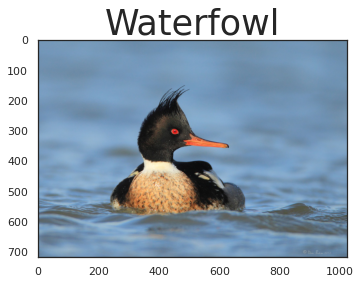

In [45]:
plt.title('Waterfowl',fontsize=35)
plt.imshow(waterfowl1);
plt.savefig('graphs/readme_waterfowl.png')

In [46]:
order_fam = final_orders[final_orders['order']=='Passeriformes'].groupby('species_group').count()['order'].sort_values(ascending=False)

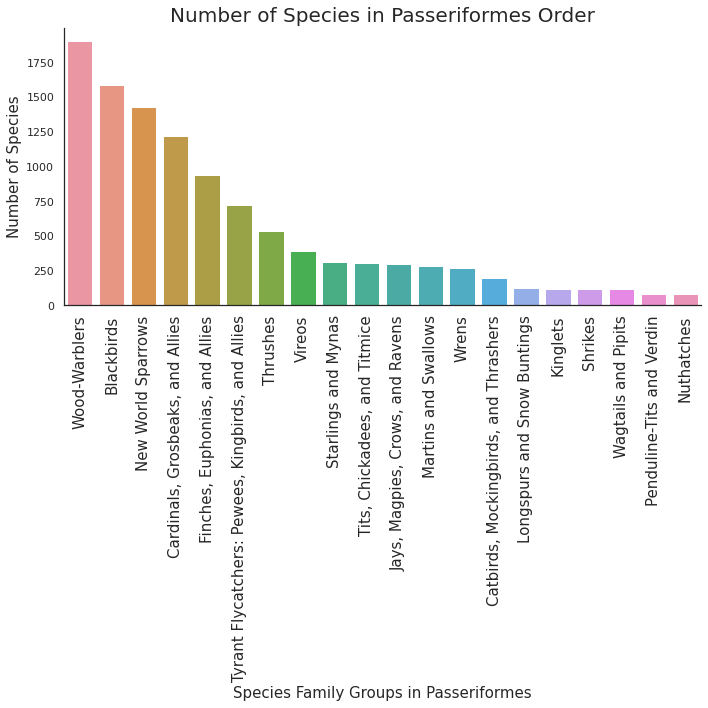

In [49]:
fig, ax = plt.subplots(figsize=(10,10))

sns.despine()
ax = sns.barplot(x=order_fam.index.values, y=order_fam.values);
plt.xticks(rotation=90, fontsize=15);
ax.set_title('Number of Species in Passeriformes Order', fontsize=20)
ax.set_xlabel('Species Family Groups in Passeriformes', fontsize=15)
ax.set_ylabel('Number of Species', fontsize=15)
ax.grid(False)
plt.tight_layout()

plt.savefig('graphs/readme_num_passer_order.png')

In [ ]:
img_dir = 'images' # folder containing all other folders of images
paths = orders_df['file_path']
bucket = 'cwbirdsimages'

def resize_images_array(img_dir, file_paths):
    # arrays of image pixels
    img_arrays = []
    
    paths = []
    
    # loop through the dataframe that is linked to its label so that all images are in the same order
    for path in tqdm(file_paths):
        s3 = boto3.client('s3')
        try:
            obj = s3.get_object(Bucket=bucket, Key=f'{img_dir}/{path}')
            img_bytes = BytesIO(obj['Body'].read())
            open_img = Image.open(img_bytes)
            arr = np.array(open_img.resize((299,299))) # resize to 200,200. possible to play around with better or worse resolution
            img_arrays.append(arr)
            paths.append(path)
        except:
#             print(path) # get file_path of ones that fail to load
            continue
    return np.array(img_arrays)

In [ ]:
# # X = resize_images_array(img_dir, orders_df['file_path'][:21129])

# print('length of sample: ', len(X))
# X.shape

# # normalize the RBG values
# X = X/255.0

# # grab numeric label
# # VALUES MUST BE NP.ARRAYS
# label = np.array(orders_df['species_group'][:21129].values)

# # labels are alphabetical
# y = (label.reshape(-1,1) == np.unique(orders_df['species_group'][:21129])).astype(float)

# y[0]

# print('label shape: ', y.shape)
# print('features shape: ', X.shape)

## Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization # CNN
from tensorflow.keras.models import Model

from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop

from tensorflow.keras.callbacks import TensorBoard # graphical visual of loss and accuracy over the epochs of train and test set
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import datetime

tf.__version__

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# print('X_train shape: ', X_train.shape)
# print('X_test shape: ', X_test.shape)
# print('y_train shape: ', y_train.shape)
# print('y_test shape: ', y_test.shape)

# log_xcept = os.path.join("logs/orders_xception", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = TensorBoard(log_dir=log_xcept, histogram_freq=1)

# input_size = (299,299,3)

# n_categories = y.shape[1]

# def create_transfer_model(input_size, n_categories, weights = 'imagenet'):
#         # note that the "top" is not included in the weights below
#         base_model = Xception(weights=weights,
#                           include_top=False,
#                           input_shape=input_size)
        
#         model = base_model.output
#         model = GlobalAveragePooling2D()(model)
#         predictions = Dense(n_categories, activation='softmax')(model)
#         model = Model(inputs=base_model.input, outputs=predictions)
        
#         return model

# def change_trainable_layers(model, trainable_index):
#     for layer in model.layers[:trainable_index]:
#         layer.trainable = False
#     for layer in model.layers[trainable_index:]:
#         layer.trainable = True

# transfer_model = create_transfer_model((299,299,3),n_categories)

# _ = change_trainable_layers(transfer_model, 132)

# print_model_properties(transfer_model, 130)

# transfer_model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# xception_final = transfer_model.fit(X, y, batch_size=1000, epochs=5, validation_split=0.1, callbacks=[tensorboard_callback])

# %reload_ext tensorboard
# %tensorboard --logdir logs/

# # transfer_model.save('saved_models/orders_xception.h5')
# species_xception = tf.keras.models.load_model('saved_models/species3_xception.h5')

# species_xception.summary()

# pickle.dump(species_xception, open('saved_models/species_xception.p', 'wb'))

In [ ]:
file = 'static/images/meet_duck.png'
a = Image.open(file)
c = np.array(a.resize((299,299)))

In [ ]:
ans = species_xception.predict(c.reshape(1,299,299,3))

In [ ]:
ans

In [ ]:
np.round(ans * 100, 1)[0].argsort()[-1:-4:-1]

In [ ]:
conf_mat = pd.read_csv('data/confusion_matrix.csv', header=None)

In [ ]:
confusion_mat = []

for i in conf_mat[0]:
    row = np.round(np.array(i.split(' ')).astype(float)).astype(int)
    confusion_mat.append(row)

In [ ]:
# !pip install mlxtend

In [ ]:
# from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# plot_confusion_matrix(conf_mat=np.array(confusion_mat), figsize=(20,20), show_absolute=False, show_normed=True, class_names=np.arange(1,40), cmap='afmhot_r', colorbar=True)[0]
# plt.savefig('graphs/readme_confusion_mat.png')

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [50]:
acc_loss = pd.read_csv('data/accuracy.csv', index_col=0)

In [51]:
acc = acc_loss['accuracy']
val_acc = acc_loss['val_accuracy']

loss = acc_loss['loss']
val_loss = acc_loss['val_loss']

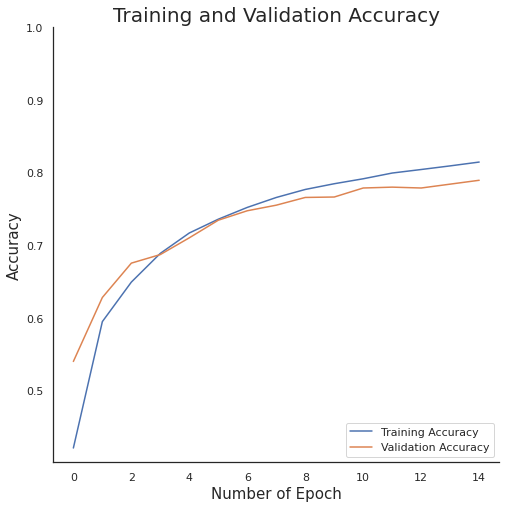

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine()
ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')
ax.legend(loc='lower right')
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xlabel('Number of Epoch', fontsize=15)
ax.set_ylim([min(plt.ylim()),1])
ax.grid(False)
plt.title('Training and Validation Accuracy', fontsize=20)
plt.savefig('graphs/readme_xception_acc.png')

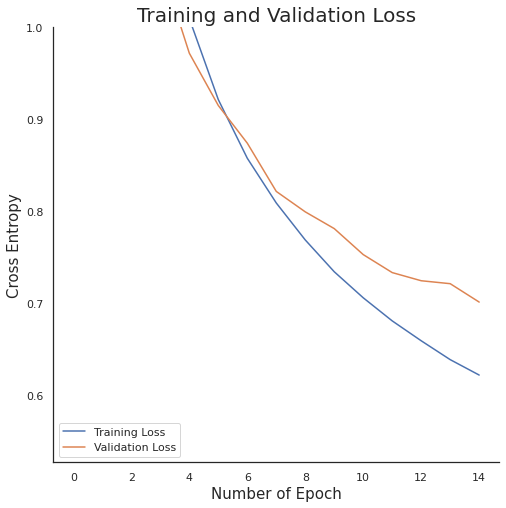

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine()
ax.plot(loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')
ax.legend(loc='lower left')
ax.set_ylabel('Cross Entropy', fontsize=15)
ax.set_xlabel('Number of Epoch', fontsize=15)
ax.set_ylim([min(plt.ylim()),1])
ax.grid(False)
plt.title('Training and Validation Loss', fontsize=20)
plt.savefig('graphs/readme_xception_loss.png')

In [ ]:
# makeup=np.array([[0.3,0.5,0.1,0.7,0.3,0.8],[0.9,0.5,0.1,0.7,0.3,0.8]])

# for i in makeup:
#     i[i.argmax()] = 1
#     i[i < 1] = 0
#     print(i)

# makeup[makeup.argmax(axis=1)] = 1

# makeup[makeup < 1] = 0

# makeup